# Methodology
- 10 architectures genere each step 
- same training
- same dataset

First of all the generator create architectures randomly and hyperparameters too
but results of training (accuracy + loss) was bad too much error (negative dimension) or the architecture begin without input,...

So we try to controle the architecture using a stat machine and getting the feature extraction dimension to be reduce to 1 and hyperparameters always random<br>
but results was still bad for the best architecture have 0.30 for the accuracy and for others we got vanishing gradient problem

Next we try to put some intelligence in hyperparameters like dense units descending
the results was better 4 of them was at least at 0.9 for the accuracy but the others got vanishing gradient problem<br>
so we try to modify manualy the architecture with a problem :
    <br>2 architectures was selected --> modify architecture + hyperparameters but only the Clasification part (Dense Layer)
    <br>and the problem found was the same for the 2 
    <br>Got to much Dense Layers or not enough

After that the generator was modified to make more sence for the classification part (Dense Layer) for this we compute the number of parameters (for exemple the output of the last layer before Flatten got (5,5,6) so we got 5*5*6 = 150 parameters)<br>
so if parameters is upper than 100 we take 30% of the value then we take 70% (those value is totally arbitrary)<br>
else we divide it by 2<br>
finally we add a other dense layer with units = nomber of class<br>
the results was great at least 0.9 for accuracy

with previous step we reduce the variability (not to much permisive) now we'll try to revese, that means we'll add more variability and be more permisif
here for the fearture extraction part, we don't force the dimension to be reduce to 1 

In [6]:
import pandas as pd
from statistics import mean

In [7]:
data = pd.read_csv('architecture_results.csv')

In [8]:
data

,file_name,training_time(s),result_loss,result_acc
0,archi_random_1_v,88.100919,4.787491798400879,0.0003
1,archi_random_2_v,36.514282,4.787491798400879,0.0
2,archi_random_3_v,0.000000,Error,Error
3,archi_random_4_v,0.000000,Error,Error
4,archi_random_5_v,0.000000,Error,Error
5,archi_random_6_v,0.000000,Error,Error
6,archi_random_7_v,255.298168,5.478751149749756,0.0899
7,archi_random_8_v,0.000000,Error,Error
8,archi_random_9_v,0.000000,Error,Error
9,archi_random_10_v,0.000000,Error,Error


# first test
- architecture + hyperparameter random

In [4]:
test1 = data[:10]

In [5]:
test1

,file_name,training_time(s),result_loss,result_acc
0,archi_random_1_v,88.100919,4.787491798400879,0.0003
1,archi_random_2_v,36.514282,4.787491798400879,0.0
2,archi_random_3_v,0.000000,Error,Error
3,archi_random_4_v,0.000000,Error,Error
4,archi_random_5_v,0.000000,Error,Error
5,archi_random_6_v,0.000000,Error,Error
6,archi_random_7_v,255.298168,5.478751149749756,0.0899
7,archi_random_8_v,0.000000,Error,Error
8,archi_random_9_v,0.000000,Error,Error
9,archi_random_10_v,0.000000,Error,Error


# second test
- architecture : control with stat machine
- hyperparameter random

In [6]:
test2 = data[10:20]

In [7]:
test2

,file_name,training_time(s),result_loss,result_acc
10,archi_random_1_v,29.886414,2.1078140058517456,0.2107
11,archi_random_2_v,34.585087,NaN,0.098
12,archi_random_3_v,44.384779,1.8254141145706178,0.3238
13,archi_random_4_v,31.887646,NaN,0.098
14,archi_random_5_v,36.501743,NaN,0.098
15,archi_random_6_v,35.660906,NaN,0.098
16,archi_random_7_v,46.680250,NaN,0.098
17,archi_random_8_v,53.900858,NaN,0.098
18,archi_random_9_v,31.916714,NaN,0.098
19,archi_random_10_v,21.039890,NaN,0.098


# third test
- architecture : control with stat machine
- hyperparameter --> some intelligence

In [8]:
test3 = data[20:30]

In [9]:
test3

,file_name,training_time(s),result_loss,result_acc
20,archi_random_1_v,48.800441,0.09580338313579559,0.9694
21,archi_random_2_v,74.769896,NaN,0.098
22,archi_random_3_v,50.353904,NaN,0.098
23,archi_random_4_v,67.178742,NaN,0.098
24,archi_random_5_v,74.898739,NaN,0.098
25,archi_random_6_v,61.363391,0.6802817797660827,0.7711
26,archi_random_7_v,34.465207,0.22966426121890546,0.9311
27,archi_random_8_v,48.856267,NaN,0.098
28,archi_random_9_v,56.277142,NaN,0.098
29,archi_random_10_v,29.380182,0.1532185947716236,0.9524


## Test Modification archi 9

In [11]:
#model = keras.models.Sequential([
#		keras.layers.Input([28, 28, 1]),
#		keras.layers.Conv2D(6, kernel_size=3, strides=2, activation='tanh', padding='same'),
#		keras.layers.AveragePooling2D(pool_size=5, strides=2, padding='valid'),
#		keras.layers.Conv2D(12, kernel_size=5, strides=2, activation='selu', padding='valid'),
#		keras.layers.Flatten(),
#		keras.layers.Dense(256, activation='relu'),
#		keras.layers.Dense(120, activation='selu'),
#		keras.layers.Dense(84, activation='relu'),
#		keras.layers.Dense(10, activation='relu'),
#		keras.layers.Dense(1, activation='softmax'),
#
#	])

In [15]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.utils import plot_model

In [18]:
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()

# normaliser les pixel 0-255 -> 0-1
train_x = train_x / 255.0
test_x = test_x / 255.0

train_x = tf.expand_dims(train_x, 3)
test_x = tf.expand_dims(test_x, 3)

val_x = train_x[:5000]
val_y = train_y[:5000]

model = keras.models.Sequential([
        keras.layers.Input([28, 28, 1]),
        keras.layers.Conv2D(6, kernel_size=3, strides=2, activation='tanh', padding='same'),
        keras.layers.AveragePooling2D(pool_size=5, strides=2, padding='valid'),
        keras.layers.Conv2D(12, kernel_size=5, strides=2, activation='selu', padding='valid'),
        keras.layers.Flatten(),
        keras.layers.Dense(10, activation='softmax')
    ])


model.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
model.fit(train_x, train_y, epochs=5, validation_data=(val_x, val_y))
print(model.evaluate(test_x, test_y))

Train on 60000 samples, validate on 5000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 98us/sample - loss: 0.8057 - accuracy: 0.7659 - val_loss: 0.4450 - val_accuracy: 0.8670
Epoch 2/5
60000/60000 [==============================] - 5s 80us/sample - loss: 0.3780 - accuracy: 0.8884 - val_loss: 0.2865 - val_accuracy: 0.9170
Epoch 3/5
60000/60000 [==============================] - 8s 132us/sample - loss: 0.2695 - accuracy: 0.9204 - val_loss: 0.2224 - val_accuracy: 0.9356
Epoch 4/5
60000/60000 [==============================] - 10s 165us/sample - loss: 0.2182 - accuracy: 0.9354 - val_loss: 0.1874 - val_accuracy: 0.9450
Epoch 5/5
10000/10000 [==============================] - 1s 88us/sample - loss: 0.1690 - accuracy: 0.9494
[0.16904638549983503, 0.9494]


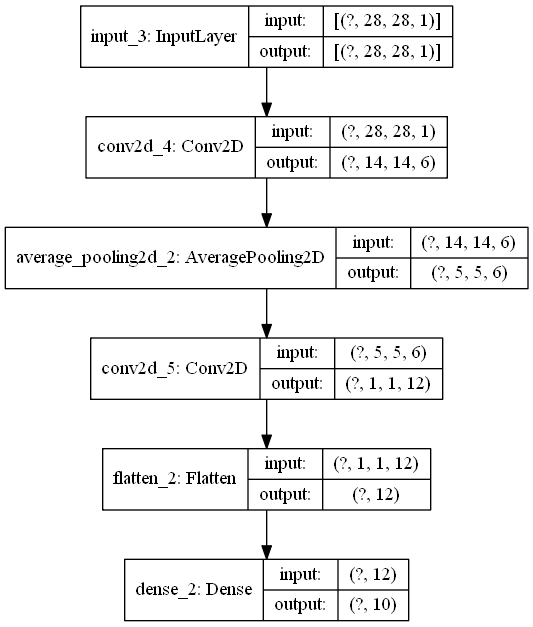

In [19]:
plot_model(model, show_shapes=True)

## Test Modification Archi 3
- Remplacement Dense 10 to 84 and 1 to 10 --> 93%
- Test compression 50% --> 150/2 = 75 --> 91% 

In [20]:
#model = keras.models.Sequential([
#		keras.layers.Input([28, 28, 1]),
#		keras.layers.Conv2D(6, kernel_size=2, strides=3, activation='relu', padding='same'),
#		keras.layers.AveragePooling2D(pool_size=2, strides=2, padding='valid'),
#		keras.layers.Flatten(),
#		keras.layers.Dense(10, activation='tanh'),
#		keras.layers.Dense(1, activation='softmax'),

In [32]:
model = keras.models.Sequential([
		keras.layers.Input([28, 28, 1]),
		keras.layers.Conv2D(6, kernel_size=2, strides=3, activation='relu', padding='same'),
		keras.layers.AveragePooling2D(pool_size=2, strides=2, padding='valid'),
		keras.layers.Flatten(),
		keras.layers.Dense(75, activation='tanh'),
		keras.layers.Dense(10, activation='softmax')
])

In [33]:
model.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
model.fit(train_x, train_y, epochs=5, validation_data=(val_x, val_y))
print(model.evaluate(test_x, test_y))

Train on 60000 samples, validate on 5000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 89us/sample - loss: 0.7598 - accuracy: 0.7652 - val_loss: 0.5222 - val_accuracy: 0.8350
Epoch 2/5
60000/60000 [==============================] - 7s 118us/sample - loss: 0.4803 - accuracy: 0.8454 - val_loss: 0.4131 - val_accuracy: 0.8678
Epoch 3/5
60000/60000 [==============================] - 7s 116us/sample - loss: 0.3990 - accuracy: 0.8726 - val_loss: 0.3431 - val_accuracy: 0.8916
Epoch 4/5
60000/60000 [==============================] - 7s 117us/sample - loss: 0.3510 - accuracy: 0.8880 - val_loss: 0.3081 - val_accuracy: 0.9068
Epoch 5/5
10000/10000 [==============================] - 1s 78us/sample - loss: 0.2874 - accuracy: 0.9095
[0.28737839368581775, 0.9095]


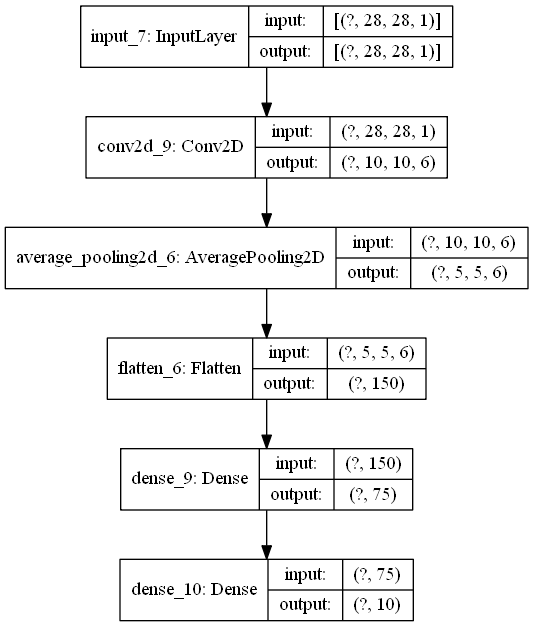

In [34]:
plot_model(model, show_shapes=True)

# Fourth Test
- modifie dense layer + hyperparameter

In [11]:
test4 = data[30:40]

In [12]:
test4

,file_name,training_time(s),result_loss,result_acc
30,archi_random_1_v,78.577000,0.07949067450854927,0.9749
31,archi_random_2_v,26.064321,0.3050533406496048,0.9019
32,archi_random_3_v,38.000784,0.9061476766586304,0.6993
33,archi_random_4_v,32.505703,0.49440958783626554,0.8485
34,archi_random_5_v,174.221448,0.08991098543666304,0.9727
35,archi_random_6_v,126.103547,0.06494664726108312,0.9795
36,archi_random_7_v,39.659550,0.21348144231140614,0.9326
37,archi_random_8_v,62.830789,0.1700618218511343,0.9467
38,archi_random_9_v,72.800281,0.07581218082737178,0.9733
39,archi_random_10_v,173.105033,0.04451985499598086,0.9867


In [16]:
model = keras.models.Sequential([
		keras.layers.Input([28, 28, 1]),
		keras.layers.Conv2D(6, kernel_size=2, strides=1, activation='relu', padding='same'),
		keras.layers.AveragePooling2D(pool_size=2, strides=1, padding='valid'),
		keras.layers.Conv2D(12, kernel_size=5, strides=3, activation='tanh', padding='same'),
		keras.layers.AveragePooling2D(pool_size=5, strides=1, padding='same'),
		keras.layers.Conv2D(36, kernel_size=2, strides=2, activation='relu', padding='valid'),
		keras.layers.MaxPooling2D(pool_size=5, strides=2, padding='same'),
		keras.layers.Conv2D(144, kernel_size=3, strides=2, activation='tanh', padding='same'),
		keras.layers.Flatten(),
		keras.layers.Dense(43, activation='selu'),
		keras.layers.Dense(30, activation='relu'),
		keras.layers.Dense(10, activation='softmax'),
	])

In [17]:
for layer in model.layers:
    print(layer.output_shape)

(None, 28, 28, 6)
(None, 27, 27, 6)
(None, 9, 9, 12)
(None, 9, 9, 12)
(None, 4, 4, 36)
(None, 2, 2, 36)
(None, 1, 1, 144)
(None, 144)
(None, 43)
(None, 30)
(None, 10)


In [25]:
sum = 0
for a in test4['result_acc']:
    sum += float(a)
print(sum/10)

0.92161


# Fifth Test
- be more permisive for feature extraction the dimension output can be more than 1

In [27]:
test5 = data[40:50]

In [28]:
test5

,file_name,training_time(s),result_loss,result_acc
40,archi_random_1_v,80.436753,0.28769842363297937,0.9085
41,archi_random_2_v,78.281544,0.07176919159367681,0.9763
42,archi_random_3_v,99.566410,0.08566732091791927,0.9713
43,archi_random_4_v,72.470139,0.07129717184931506,0.9798
44,archi_random_5_v,80.335786,0.0983532029479742,0.9684
45,archi_random_6_v,77.240802,0.1079084203535691,0.9665
46,archi_random_7_v,68.080561,0.6093278242111206,0.7882
47,archi_random_8_v,79.826793,0.05153364449184155,0.9847
48,archi_random_9_v,89.967481,0.4208268416404724,0.869
49,archi_random_10_v,81.815753,0.0887117653799709,0.9775


In [29]:
sum = 0
for a in test5['result_acc']:
    sum += float(a)
print(sum/10)

0.93902


## look archi 10

In [30]:
model = keras.models.Sequential([
		keras.layers.Input([28, 28, 1]),
		keras.layers.Conv2D(6, kernel_size=3, strides=1, activation='tanh', padding='same'),
		keras.layers.AveragePooling2D(pool_size=3, strides=3, padding='same'),
		keras.layers.Conv2D(12, kernel_size=3, strides=1, activation='selu', padding='valid'),
		keras.layers.Flatten(),
		keras.layers.Dense(230, activation='relu'),
		keras.layers.Dense(161, activation='selu'),
		keras.layers.Dense(10, activation='softmax'),

	])

In [31]:
for layer in model.layers:
    print(layer.output_shape)

(None, 28, 28, 6)
(None, 10, 10, 6)
(None, 8, 8, 12)
(None, 768)
(None, 230)
(None, 161)
(None, 10)
